In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

#libary getting stock data
from pandas_datareader import data as pdr

# library to forecast time series stock prices
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
days_to_extract = 1000
days_to_forecast = 20

In [3]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [4]:
date_end, date_start

(datetime.date(2020, 7, 16), datetime.date(2017, 10, 20))

In [5]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [6]:
m = Prophet()

In [7]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [8]:
#chaning columns names. fbprophet needst to get column name 'ds' for date and 'y' for value
df.columns = ['ds', 'High', 'Low', 'Open', 'y', 'Volume', 'Adj Close']
df

,ds,High,Low,Open,y,Volume,Adj Close
0,2017-10-20,37.209999,36.990002,37.200001,37.040001,144269.0,35.829071
1,2017-10-23,37.220001,37.060001,37.099998,37.119999,166719.0,35.906456
2,2017-10-24,37.220001,36.930000,36.970001,37.220001,138598.0,36.003181
3,2017-10-25,37.189999,36.540001,37.160000,36.570000,243960.0,35.374439
4,2017-10-26,37.040001,36.700001,36.770000,36.970001,266729.0,35.761356
...,...,...,...,...,...,...,...
667,2020-06-23,47.972500,47.459999,47.562500,47.652500,207895.0,47.652500
668,2020-06-24,47.537498,46.580002,47.457500,46.622501,764968.0,46.622501
669,2020-06-25,46.742500,46.042500,46.430000,46.445000,294754.0,46.445000
670,2020-06-26,47.230000,46.442501,47.000000,46.686199,365825.0,46.686199


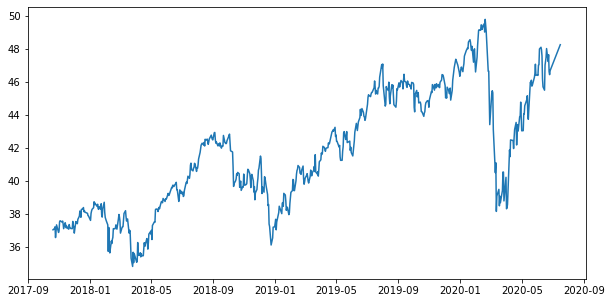

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df.set_index('ds').y)
plt.show()

In [10]:
m.fit(df)

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1032,2021-07-12
1033,2021-07-13
1034,2021-07-14
1035,2021-07-15
1036,2021-07-16


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1032,2021-07-12,50.359026,38.623446,61.382210
1033,2021-07-13,50.399945,38.511626,61.176815
1034,2021-07-14,50.415535,38.975337,61.263269
1035,2021-07-15,50.437254,38.848532,61.485975
1036,2021-07-16,50.503258,38.537782,61.311617


In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-20,36.208045,34.872731,37.466972,36.208045,36.208045,-0.090026,-0.090026,-0.090026,-0.176747,-0.176747,-0.176747,0.086721,0.086721,0.086721,0.0,0.0,0.0,36.118019
1,2017-10-23,36.251068,34.995448,37.656778,36.251068,36.251068,0.092252,0.092252,0.092252,-0.048379,-0.048379,-0.048379,0.140631,0.140631,0.140631,0.0,0.0,0.0,36.343320
2,2017-10-24,36.265409,35.045627,37.738561,36.265409,36.265409,0.094361,0.094361,0.094361,-0.078819,-0.078819,-0.078819,0.173180,0.173180,0.173180,0.0,0.0,0.0,36.359769
3,2017-10-25,36.279749,35.006434,37.700618,36.279749,36.279749,0.078797,0.078797,0.078797,-0.132859,-0.132859,-0.132859,0.211656,0.211656,0.211656,0.0,0.0,0.0,36.358547
4,2017-10-26,36.294090,35.150259,37.831025,36.294090,36.294090,0.076700,0.076700,0.076700,-0.178409,-0.178409,-0.178409,0.255109,0.255109,0.255109,0.0,0.0,0.0,36.370790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2021-07-12,49.892193,38.623446,61.382210,38.447027,60.422979,0.466833,0.466833,0.466833,-0.048379,-0.048379,-0.048379,0.515212,0.515212,0.515212,0.0,0.0,0.0,50.359026
1033,2021-07-13,49.900129,38.511626,61.176815,38.378211,60.443555,0.499815,0.499815,0.499815,-0.078819,-0.078819,-0.078819,0.578634,0.578634,0.578634,0.0,0.0,0.0,50.399945
1034,2021-07-14,49.908066,38.975337,61.263269,38.336673,60.480684,0.507469,0.507469,0.507469,-0.132859,-0.132859,-0.132859,0.640328,0.640328,0.640328,0.0,0.0,0.0,50.415535
1035,2021-07-15,49.916002,38.848532,61.485975,38.296867,60.543380,0.521252,0.521252,0.521252,-0.178409,-0.178409,-0.178409,0.699661,0.699661,0.699661,0.0,0.0,0.0,50.437254


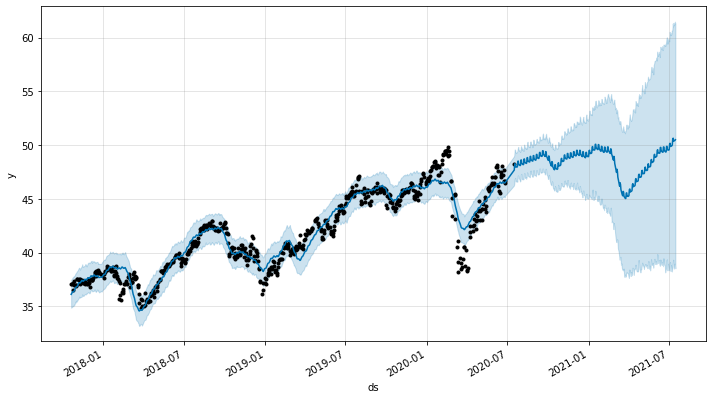

In [14]:
m.plot(forecast).autofmt_xdate()

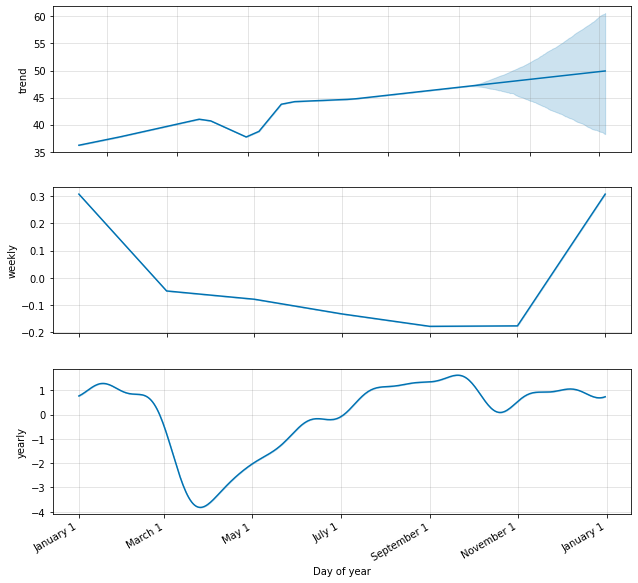

In [15]:
m.plot_components(forecast).autofmt_xdate()

In [16]:
df.y = np.log(df.y)
df['cap' ]= 8.5

df

m = Prophet(growth = 'logistic')
m.fit(df)

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


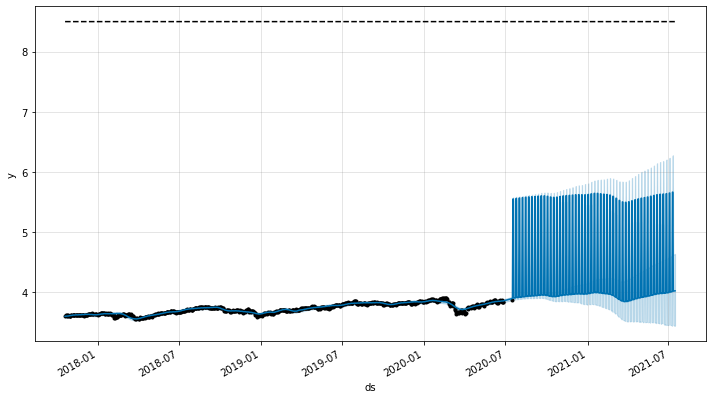

In [17]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst).autofmt_xdate()
#m.plot(fcst, uncertainty=True).autofmt_xdate()

In [18]:
m.changepoints

21    2017-11-20
43    2017-12-20
64    2018-01-23
86    2018-02-22
107   2018-03-23
129   2018-04-26
150   2018-05-29
172   2018-06-28
193   2018-07-27
214   2018-08-28
236   2018-09-27
257   2018-10-26
279   2018-11-27
300   2018-12-28
322   2019-01-30
343   2019-02-28
364   2019-03-29
386   2019-05-02
407   2019-06-04
429   2019-07-04
450   2019-08-02
472   2019-09-04
493   2019-10-03
515   2019-11-04
536   2019-12-03
Name: ds, dtype: datetime64[ns]

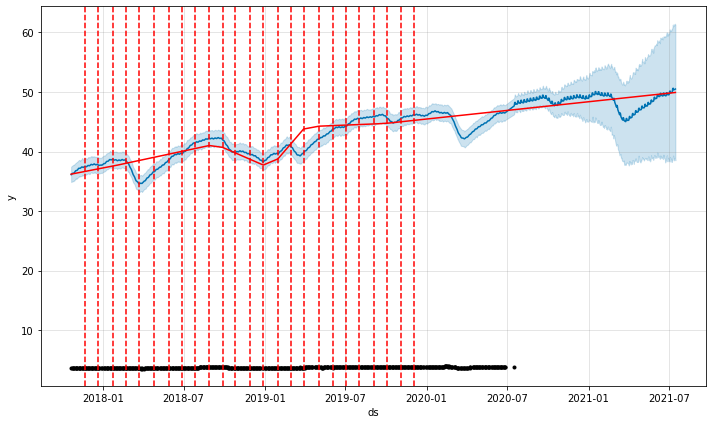

In [19]:


fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0)
plt.show()

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


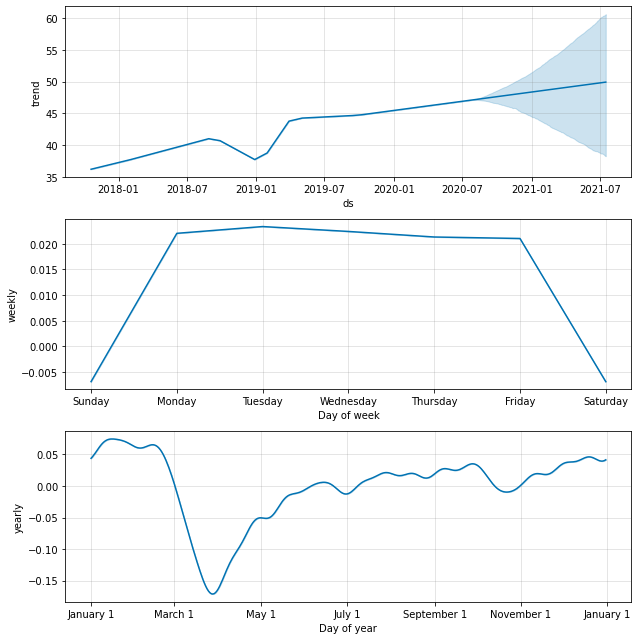

In [20]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(df)
fig = m.plot_components(forecast)